In [1]:
import sys
sys.path.append('../../feature_selection')

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif,chi2,f_classif,SelectKBest
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import numpy as np
from skopt.space import Integer
from skopt.space import Real
from skopt.space import Categorical
from skopt import BayesSearchCV
import pickle
import feature_selection_fnc

In [3]:
cleaned_df=pd.read_csv('../../../training_data/variance_cleanup_features/variance_cleanup_selected_features.csv')
cleaned_df.set_index('url',inplace=True)

In [4]:
cleaned_df

,phishing,https_true,url_digits_count,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,...,html_hl_external_favicon,html_hl_external_null_form,html_domain_titel,html_windows_status,html_prompt,html_unsafe_anchor,html_iframe_invisible,html_empty_title,openpagescore,cantina
url,,,,,,,,,,,,,,,,,,,,,
https://www.paducahbank.com/Learn/Whats-Happening/WOW-Magazine/Articles/Phyllis-Russell,0,1,0,87,2,0,3,7,0,0,...,0.0,0.0,0,0,0,1,0,0,4,1.0
https://whatis.techtarget.com/definition/input-output-I-O,0,1,0,57,2,0,3,4,0,0,...,0.0,0.0,0,0,0,1,0,0,6,1.0
https://endeavour.org.uk/,0,1,0,25,2,0,0,3,0,0,...,0.0,0.0,0,0,0,1,0,0,3,1.0
https://gb.123rf.com/footage_121810088_online-registration-front-text-scrolling-on-light-blue-digital-led-display-board-pixel-light-screen-.html?term=121810088,0,1,21,159,3,2,15,3,1,1,...,0.0,0.0,0,0,0,1,0,0,6,1.0
https://www.what-song.com/Movies/Soundtrack/1691/Save-the-Last-Dance,0,1,4,68,2,0,4,6,0,0,...,0.0,0.0,0,0,0,0,0,0,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://smbc-wy.com,1,0,0,18,1,0,1,2,0,0,...,0.0,0.0,0,0,0,1,0,0,0,0.0
http://seuspontosnatalinosincluaseuspontoshoje.club/promocao/descontao/card/home.php?/-5bd/WqhfQbAlLUzAfjSLYzZcOEuURvjjshgpMnP1vIGpaGETuQCK/Pw0qsN7XG1neIhFz5eyuqPJd5mFwxHuZcVIILDiAXQdFX=,1,0,7,186,2,0,1,9,1,1,...,0.0,0.0,0,0,0,0,0,0,0,0.0
https://verificarlbcponline.papomz.com/,1,1,0,39,2,0,0,3,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0


In [5]:
features=cleaned_df.loc[:,'https_true':]
label=cleaned_df.loc[:,'phishing']

In [6]:
mi = SelectKBest(score_func=mutual_info_classif, k=40)
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3,random_state=42)
mi.fit(X_train,y_train)
X_train_selected=X_train.loc[:, mi.get_support()]
X_test_selected=X_test.loc[:, mi.get_support()]

In [7]:
X_train_selected.to_csv('decision_tree_selected_train_features_new.csv',index=True)
X_test_selected.to_csv('decision_tree_selected_test_features_new.csv',index=True)

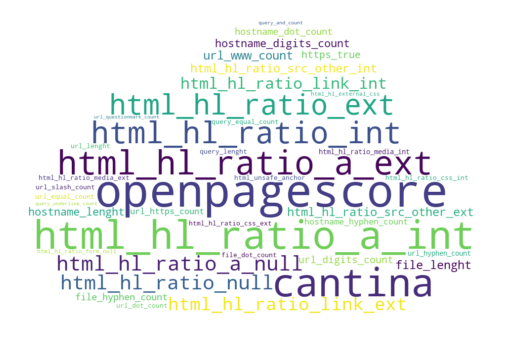

In [8]:
feature_selection_fnc.wordcloud_features(X_train,mi,40,"../../../images/feature_selection/decision_tree/decision_tree_selected_features_word_cloud_new.png",'../cloud.png')

In [9]:
X_train_selected

,https_true,url_digits_count,url_lenght,url_dot_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_www_count,url_https_count,...,html_hl_ratio_src_other_ext,html_hl_ratio_media_int,html_hl_ratio_media_ext,html_hl_ratio_form_null,html_hl_ratio_css_int,html_hl_ratio_css_ext,html_hl_external_css,html_unsafe_anchor,openpagescore,cantina
url,,,,,,,,,,,,,,,,,,,,,
https://idorange57.wixsite.com/my-site,1,2,38,2,1,3,0,0,0,1,...,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0,4,1.0
https://betasus33.blogspot.com/,1,2,31,2,0,3,0,0,0,1,...,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1,5,0.0
http://13.78.215.193/banks/Tangerine/pin.php,0,10,44,4,0,5,0,0,0,0,...,0.250000,1.000000,0.000000,0.0,1.000000,0.000000,0.0,1,0,0.0
http://forestinhouse.com/wp-includes/Text/privmsg/pretraga.php/qer/enbpc/?addition=10gx1neq25mkx,0,5,96,2,1,9,1,1,0,0,...,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0,2,0.0
https://www.polskashoes.top/,1,0,28,2,0,3,0,0,1,1,...,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.0,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://docs.google.com/forms/d/e/1FAIpQLSfgVWY26SZ_Aumb4Tj52fkdiZr979r97zbXoy45CT7ojbzUmQ/viewform,1,14,99,2,0,7,0,0,0,1,...,1.000000,0.000000,1.000000,0.0,0.000000,1.000000,1.0,0,10,0.0
http://yaadinc.com/labanquepostale/pst/cb257/index2.html,0,4,56,2,0,6,0,0,0,0,...,0.000000,0.888889,0.111111,0.0,0.933333,0.066667,1.0,1,0,0.0
https://www.starlingbank.com/,1,0,29,2,0,3,0,0,1,1,...,0.181818,1.000000,0.000000,0.0,0.000000,1.000000,1.0,1,5,1.0


In [16]:
import os
os.listdir('../../../images/hyperparameter_tuning/svm/SVM_confusion_matrix_before_tuning')

[]

Accuracy: 0.9506666666666667
Recall: 0.9520616828695944


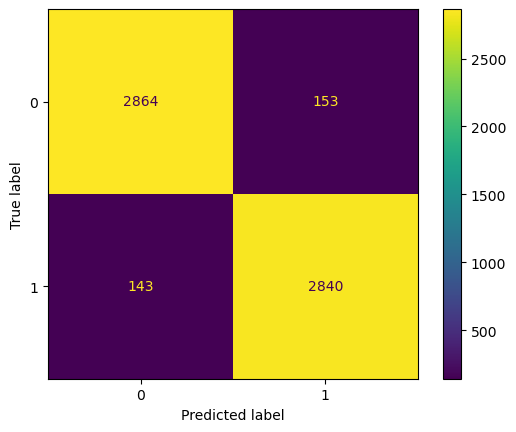

In [10]:
clf = DecisionTreeClassifier()
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()
#displ.plot().sa('../../../images/hyperparameter_tuning/svm/SVM_confusion_matrix_before_tuning',dpi=300, bbox_inches = "tight")
plt.savefig('../../../images/hyperparameter_tuning/decision_tree/decision_tree_confusion_matrix_before_tuning_new',dpi=300, bbox_inches = "tight")

In [38]:
params = {'criterion': Categorical(['gini','entropy']),
              'max_depth': Integer(1,100,prior='log-uniform'),
              'splitter' : Categorical(['best','random']),
              'min_samples_split': Real(1e-3,1.0,prior='log-uniform'),
              'max_leaf_nodes': Integer(3,100,prior='uniform')}

In [39]:
opt = BayesSearchCV(
    DecisionTreeClassifier(),
    search_spaces=params,
    cv=4,
    scoring='accuracy',
    #random_state=42,
    n_iter=20,
    verbose=1,
)
np.int = int

In [40]:
opt.fit(X_train_selected,y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fi

BayesSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_iter=20,
              scoring='accuracy',
              search_spaces={'criterion': Categorical(categories=('gini', 'entropy'), prior=None),
                             'max_depth': Integer(low=1, high=100, prior='log-uniform', transform='normalize'),
                             'max_leaf_nodes': Integer(low=3, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'splitter': Categorical(categories=('best', 'random'), prior=None)},
              verbose=1)

In [41]:
print(opt.best_score_)
print(opt.best_params_)

0.9547857142857142
OrderedDict([('criterion', 'gini'), ('max_depth', 72), ('max_leaf_nodes', 61), ('min_samples_split', 0.001), ('splitter', 'best')])


Accuracy: 0.9571666666666667
Recall: 0.9611129735165941


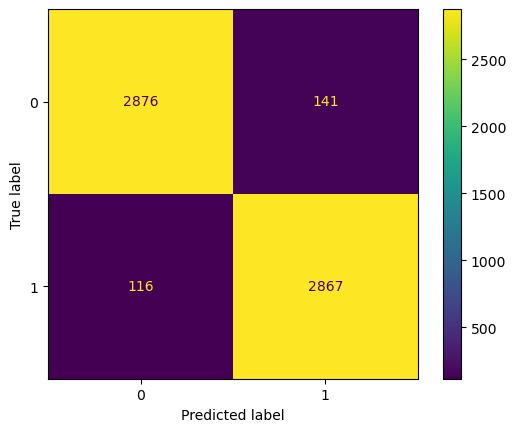

In [11]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=72,max_leaf_nodes=61,min_samples_split=0.001,splitter='best')
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()
#displ.plot().sa('../../../images/hyperparameter_tuning/svm/SVM_confusion_matrix_before_tuning',dpi=300, bbox_inches = "tight")
plt.savefig('../../../images/hyperparameter_tuning/decision_tree/decision_tree_confusion_matrix_after_tuning_new',dpi=300, bbox_inches = "tight")

In [12]:
pickle.dump(clf, open('../../saved_models/decision_tree/decision_tree_model_tuned_new.pkl', 'wb'))